In [1]:
import pandas as pd
from nltk.tokenize import word_tokenize,sent_tokenize
from nltk.sentiment.vader import SentimentIntensityAnalyzer 

In [2]:
import spacy
nlp = spacy.load('en_core_web_sm')

In [3]:
import nltk

In [4]:
import re
import emoji

In [5]:
file = pd.read_excel("LabeledText.xlsx")

In [6]:
file.head()

,File Name,Caption,LABEL
0,1.txt,How I feel today #legday #jelly #aching #gym,negative
1,10.txt,@ArrivaTW absolute disgrace two carriages from...,negative
2,100.txt,This is my Valentine's from 1 of my nephews. I...,positive
3,1000.txt,betterfeelingfilms: RT via Instagram: First da...,neutral
4,1001.txt,Zoe's first love #Rattled @JohnnyHarper15,positive


In [7]:
file.drop('File Name',axis=1, inplace=True)

In [8]:
def cleaning (text):
    text = re.sub('[^a-zA-Z]', ' ', str(text).lower().strip())
    text = re.sub('@[A-Za-z0-9_]+', '', text) 
    text = re.sub('#','',text) 
    text = re.sub('RT[\s]+','',text)
    text = re.sub('https?:\/\/\S+', '', text) 
    text = re.sub('\n',' ',text)
    text = emoji.replace_emoji(text, replace='')
    return text

In [9]:
file["Newtweet"]=file["Caption"].apply(cleaning)

In [10]:
def text_preprocessing(text):
    doc = nlp(text)
    tokens = [token.lemma_.lower() for token in doc if not token.is_stop and not token.is_punct]
    return ' '.join(tokens)
file['Newtweet'] = file['Newtweet'].apply(text_preprocessing)
file

,Caption,LABEL,Newtweet
0,How I feel today #legday #jelly #aching #gym,negative,feel today legday jelly ache gym
1,@ArrivaTW absolute disgrace two carriages from...,negative,arrivatw absolute disgrace carriage bangor h...
2,This is my Valentine's from 1 of my nephews. I...,positive,valentine s nephew elated little thing ...
3,betterfeelingfilms: RT via Instagram: First da...,neutral,betterfeelingfilm rt instagram day film ...
4,Zoe's first love #Rattled @JohnnyHarper15,positive,zoe s love rattle johnnyharper
...,...,...,...
4864,OMG. Well done #Eskom! 'Man dies during #LoadS...,positive,omg eskom man die loadshedde power...
4865,Feelin' the love in here! #ValentinesDay #caring,positive,feelin love valentinesday care
4866,#blue #eyes can't be #beaten,neutral,blue eye t beat
4867,LA CHUCHA LOUUU TE CHUPO LOS OJOS..!,neutral,la chucha louuu te chupo los ojos


In [11]:
file

,Caption,LABEL,Newtweet
0,How I feel today #legday #jelly #aching #gym,negative,feel today legday jelly ache gym
1,@ArrivaTW absolute disgrace two carriages from...,negative,arrivatw absolute disgrace carriage bangor h...
2,This is my Valentine's from 1 of my nephews. I...,positive,valentine s nephew elated little thing ...
3,betterfeelingfilms: RT via Instagram: First da...,neutral,betterfeelingfilm rt instagram day film ...
4,Zoe's first love #Rattled @JohnnyHarper15,positive,zoe s love rattle johnnyharper
...,...,...,...
4864,OMG. Well done #Eskom! 'Man dies during #LoadS...,positive,omg eskom man die loadshedde power...
4865,Feelin' the love in here! #ValentinesDay #caring,positive,feelin love valentinesday care
4866,#blue #eyes can't be #beaten,neutral,blue eye t beat
4867,LA CHUCHA LOUUU TE CHUPO LOS OJOS..!,neutral,la chucha louuu te chupo los ojos


In [12]:
text=file['Newtweet']

In [13]:
text

0                feel today   legday   jelly   ache   gym
1         arrivatw absolute disgrace carriage bangor h...
2       valentine s    nephew   elated   little thing ...
3       betterfeelingfilm   rt instagram   day film   ...
4                    zoe s love   rattle   johnnyharper  
                              ...                        
4864    omg     eskom    man die   loadshedde    power...
4865                feelin   love    valentinesday   care
4866                                  blue   eye t   beat
4867                 la chucha louuu te chupo los ojos   
4868      colorsplash bw   zealous remedio   herbale y...
Name: Newtweet, Length: 4869, dtype: object

In [14]:
for t in text:
    tokens = word_tokenize(t)
    print(tokens)
 

['feel', 'today', 'legday', 'jelly', 'ache', 'gym']
['arrivatw', 'absolute', 'disgrace', 'carriage', 'bangor', 'half', 'way', 'stand', 'room', 'disgrace']
['valentine', 's', 'nephew', 'elated', 'little', 'thing', 'big', 'good', 'thing']
['betterfeelingfilm', 'rt', 'instagram', 'day', 'film', 'powerless', 't']
['zoe', 's', 'love', 'rattle', 'johnnyharper']
['chaotic', 'love', 'giclee', 'print', 'art', 'love', 'chaotic', 'abstract', 'blue', 'silver', 'print', 'buy']
['gna', 'mad', 'reach', 'goal', 'reject', 'wrong', 'girl', 'getting', 'started', 'turn', 'head']
['day', 's', 'daily', 'routine', 'feel', 'guuuuurdddd', 'ache', 'painnogain', 'feelinggood']
['animalabuse', 'toronto', 'puppy', 'torture', 'offer', 'k', 'reward', 'puppy', 'beat', 'bind', 'burn']
['mike', 'accept', 'plastic', 'rise', 'wfaamike', 'wfaachannel', 'wfaagmt', 'reject']
['eat', 'cookie', 'remorse']
['s', 'shock', 'acceptable', 'kids', 'tv', 'show', 'day', 'shock', 'shocked']
['excited', 'announce', 'launch', 'affiliate

['rt', 'abandon', 'pic', 'abandon', 'train', 'station', 'abkhazia', 'georgia']
['rt', 'cheeseburguer', 'ashton', 'sos', 's', 'gossip', 'mike', 'underwear', 'expose', 'wow', 'butt']
['breathtake', 'photo', 'abandon', 'place']
['rt', 'officialabow', 'iamblack', 'imatter', 'etsy', 'community', 'handmade', 'black', 'egyptian', 'amber']
['brace', 'beautiful', 'walk', 'coast', 'carnoustie', 'angus', 'desolate']
['deadbeat', 'b', 'daddy', 's', 'mom', 'abandon', 'message', 'hope', 'doesn', 't', 'dad', 's', 'rebellious', 'streak']
['rt', 'horrifyingpage', 'find', 'basement', 'abandon', 'house']
['rt', 'rileydevildog', 'nbcnewyork', 'dog', 'sweater', 'find', 'abandonde', 'll', 'happen']
['valentine', 'day', 'lunch', 'photographer', 'abandon', 'court', 'coverage', 'stephenville', 'miss', 'guy']
['rt', 'thedailyotter', 'abandon', 'otter', 'pup', 'recover', 'night', 'cold', 'w']
['looks', 'suitably', 'abash', 'hour', 'fail', 'recall', 'interesting', 'rabbit', 'warren']
['stack', 'billie', 'holiday'

['rt', 'belleamie', 've', 'pitch', 'hard', 'cuz', 'fan', 'totally', 'want', 'reallucylawless', 'xena', 'revival', 'http']
['rt', 'jay', 'naidoo', 'truer', 'wisdom', 'popefrancis', 'articulate', 'inequality', 'drive', 'human', 'greed', 'root', 'social', 'evil', 'http']
['rt', 'adoreaboutluke', 'luke', 'smiling', 'important', 'tummy', 'flip', 'excitement', 'joy', 'happiness', 'know', 'happy']
['rt', 'terramare', 'wntonight', 'korean', 'priest', 'dog', 'meat', 'evil', 'custom', 'pointifex', 'help', 'call', 'stopboknal']
['teenager', 'human', 'georgemichael', 'kid', 'need', 'well', 'pic', 'george', 'teen']
['rt', 'tvline', 'bloody', 'ashvsevildead', 'bruce', 'campbell', 'reallucylawless', 'sam', 'raimi', 'stab']
['rt', 'accesshollywood', 'listen', 'little', 'monster', 'ladygaga', 'win', 't', 'sing', 'ahshotel', 'evil', 'fabulous', 'yasgaga', 'sdcc', 'h']
['table', 'stain', 'look', 'like', 'exasperate', 'dog']
['rt', 'orrie', 'yes', 'need', 'calm', 's', 'affectionate', 'big', 'bro', 'doffy'

['erdo', 've', 'davuto', 'lu', 'zgecan', 'n', 'ailesini', 'arad']
['rt', 'kendralee', 'hand', 'ruin', 'ooooh', 'wellll']
['lmfao', 'hot', 'girl', 'selfie', 'ruin']
['rt', 'toscimarie', 'rt', 'shaydechelle', 'kanye', 's', 'boot', 'ruin', 'afternoon']
['rt', 'ifntbt', 'twt', 'ok', 'leave', 'bottle', 'u', 'ruin', 'infinite', 'bad']
['ps', 's', 'ex', 'sadly']
['career', 'ruin', 'sex', 'donut', 'wow']
['rt', 'tobehealhty', 'sex', 'ruin', 'photo', 'album']
['sainsbury', 'tomorrow', 's', 'team', 'lunch', 'ruin', 'thank', 'broccoli', 's', 'caterpillar']
['rt', 'whitevsbiacktwt', 'lmfao', 'give', 'thumb', 'lady', 'scared', 'hahaha']
['rt', 'kaylz', 'dfangirl', 'don', 't', 'know', 'scared', 'suspension', 'video', 'kill', 'raphassecret']
['rt', 'jessicabrunnerr', 'need', 'guy', 'like', 'keval', 'world', 'itzkevalz']
['rt', 'retro', 'spectro', 'scared', 'straight', 'like', 'pt', 'w', 'leanandcuisine', 'youfunnyb', 'ziyeed']
['rt', 'phxken', 'beginning', 'change', 'patriot', 'scarce', 'man', 'brave

['http', 't', 'co', 'uw', 'noj', 'cm', 'http', 't', 'co', 'hytif', 'byht']
['end', 'date', 'wednesday', 'http', 't', 'co', 'bxmsekbosi']
['x', 'fashion', 'joystick', 'thumbstick', 'cap', 'game', 'ps', 'ps', 'xbox', 'controller', 'black', 'rea', 'http', 't', 'co', 'chyz', 'dvw', 'http', 't', 'co', 'hkptyhqtxj']
['rt', 'nbcnew', 'black', 'man', 'shoot', 'head', 'cop', 'traffic', 'stop', 'http', 't', 'co', 'mhh', 'msx', 'dj', 'http', 't', 'co', 'vrsgesn', 'o']
['surefire', 'px', 'tactical', 'single', 'output', 'lead', 'black', 'flashlight', 'px', 'c', 'bk', 'read', 'ebay', 'http', 't', 'co', 'ifgxj', 'zmvq', 'http', 't', 'co', 'e', 'fn', 'pdth']
['black', 'http', 't', 'co', 'tmpypl']
['rt', 'dynamitefilm', 'light', 'hearted', 'moment', 'set', 'actor', 'ianmharde', 'https', 't', 'co', 'zw', 'r', 'dfx', 'dynamitefilm', 'tatesteinsiek', 'happy', 'htt']
['cell', 'phone', 'usa', 'bluetooth', 'smart', 'wrist', 'watch', 'phone', 'mate', 'cell', 'phone', 'sim', 'card', 'black', 'http', 't', 'co',

['icemoon', 'intense', 'sample', 'http', 't', 'co', 'vbvrfilhmu', 'djicemoon', 'dubstep', 'electronic', 'trapmusic', 'download', 'edm', 'http', 't', 'co', 'u', 'awolgw']
['deal', 'http', 't', 'co', 'vmbsbobt', 'b', 'cocochoco', 'complex', 'brazilian', 'keratin', 'treatment', 'kit', 'new', 'intense', 'http', 't', 'co', 'hqlg', 'm', 'nx']
['harold', 'green', 'http', 't', 'co', 'nlcphr', 'w']
['calum', 'mikey', 'look', 'like', 'watch', 'intense', 'tennis', 'match', 'go', 'forth', 'http', 't', 'co', 'tglothi', 'h']
['mike', 'rt', 'gottago', 'filmography', 'mike', 'adam', 'jim', 'gottago']
['smart', 'drive', 'adventurous', 'passionate', 'powerful', 'excited', 'little', 'nervous']
['rt', 'classicrockmag', 'davemustaine', 'intimidate', 'kikoloureiro', 's', 'talent', 'http', 't', 'co', 'xni', 'mcbaxz', 'http', 't', 'co', 'n', 'c', 'oyu']
['texas', 'rifle', 'tote', 'activist', 'intimidate', 'demonstrator', 'call', 'removal', 'racist', 'confederate', 'statue', 'http', 't', 'co', 'h', 'rdjj', 'zk

In [15]:
sia = SentimentIntensityAnalyzer()

In [16]:
text

0                feel today   legday   jelly   ache   gym
1         arrivatw absolute disgrace carriage bangor h...
2       valentine s    nephew   elated   little thing ...
3       betterfeelingfilm   rt instagram   day film   ...
4                    zoe s love   rattle   johnnyharper  
                              ...                        
4864    omg     eskom    man die   loadshedde    power...
4865                feelin   love    valentinesday   care
4866                                  blue   eye t   beat
4867                 la chucha louuu te chupo los ojos   
4868      colorsplash bw   zealous remedio   herbale y...
Name: Newtweet, Length: 4869, dtype: object

In [17]:
def analyze_sentiment(text):
    for t in text:
        sentiment_score = sia.polarity_scores(t)
        compound_score = sentiment_score['compound']
        if compound_score >= 0.05:
            sentiment = "positive"
        elif compound_score <= -0.05:
            sentiment = "negative"
        else:
            sentiment = "neutral"

        print('Text: ',t)
        print("Sentiment: ",sentiment)
        print("Sentiment Scores: ",sentiment_score)

In [18]:
import seaborn as sns

<AxesSubplot:xlabel='LABEL', ylabel='count'>

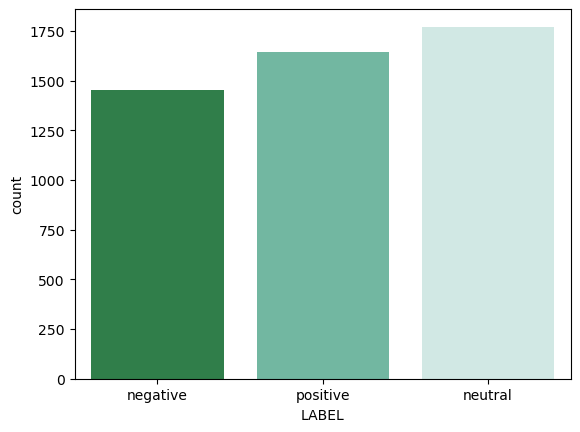

In [19]:
sns.countplot(x="LABEL",data=file, palette="BuGn_r")

In [20]:
from tqdm.notebook import tqdm

In [21]:
# Run the polarity score on the entire dataset
res = {}
for myid, text in tqdm(text.items(), total=len(text)):
    res[myid] = sia.polarity_scores(text)

  0%|          | 0/4869 [00:00<?, ?it/s]

In [22]:
vaders = pd.DataFrame(res).T
vaders = vaders.reset_index().rename(columns={'index': 'Id'})
vaders = vaders.merge(file, left_index=True, right_index=True)

In [23]:
vaders["LABEL"]=vaders["LABEL"].map({'positive':1,'negative':-1,'neutral':0})


In [24]:
vaders

,Id,neg,neu,pos,compound,Caption,LABEL,Newtweet
0,0,0.342,0.658,0.000,-0.3818,How I feel today #legday #jelly #aching #gym,-1,feel today legday jelly ache gym
1,1,0.444,0.556,0.000,-0.7506,@ArrivaTW absolute disgrace two carriages from...,-1,arrivatw absolute disgrace carriage bangor h...
2,2,0.000,0.467,0.533,0.7806,This is my Valentine's from 1 of my nephews. I...,1,valentine s nephew elated little thing ...
3,3,0.390,0.610,0.000,-0.4939,betterfeelingfilms: RT via Instagram: First da...,0,betterfeelingfilm rt instagram day film ...
4,4,0.000,0.417,0.583,0.6369,Zoe's first love #Rattled @JohnnyHarper15,1,zoe s love rattle johnnyharper
...,...,...,...,...,...,...,...,...
4864,4864,0.640,0.360,0.000,-0.7964,OMG. Well done #Eskom! 'Man dies during #LoadS...,1,omg eskom man die loadshedde power...
4865,4865,0.000,0.213,0.787,0.8126,Feelin' the love in here! #ValentinesDay #caring,1,feelin love valentinesday care
4866,4866,0.000,1.000,0.000,0.0000,#blue #eyes can't be #beaten,0,blue eye t beat
4867,4867,0.000,1.000,0.000,0.0000,LA CHUCHA LOUUU TE CHUPO LOS OJOS..!,0,la chucha louuu te chupo los ojos


In [25]:
X=vaders['Newtweet']
y=vaders.LABEL

In [26]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
vectorizer = CountVectorizer()
x_train = vectorizer.fit_transform(X)


In [29]:
X_train, X_test, y_train, y_test = train_test_split(x_train, y, test_size=0.2, random_state=42)

In [30]:
logistic_pipeline=Pipeline([("Classifier",LogisticRegression(max_iter=1000))])
y_pred=logistic_pipeline.fit(X_train,y_train).predict(X_test)

## Accuracy check

In [31]:
from sklearn.metrics import accuracy_score

In [32]:
accuracy_score(y_test,y_pred)*100 

70.4312114989733

## Decisiontreeclassifier + Accuracy 

In [33]:
pipeline2=Pipeline([("Classifier",DecisionTreeClassifier())])
y_pred2=pipeline2.fit(X_train,y_train).predict(X_test)
accuracy_score(y_test,y_pred2)*100

69.30184804928132

### testing text

In [34]:
testdata="""According to Hamas, they launched the attack because “Palestinians’ 
            suffering had become intolerable under unending Israeli military occupation and
            increasing settlements in Gaza”. The Hamas militants are holding an estimated 150 people taken hostage
            from Israel, reported AP."""
tokens = word_tokenize(testdata)

sentiment_score = sia.polarity_scores(testdata)

compound_score = sentiment_score['compound']

if compound_score >= 0.05:
    sentiment = "positive"
elif compound_score <= -0.05:
    sentiment = "negative"
else:
    sentiment = "neutral"


In [35]:
print("Sentiment: ",sentiment)
print("Sentiment Scores: ",sentiment_score)

Sentiment:  negative
Sentiment Scores:  {'neg': 0.145, 'neu': 0.82, 'pos': 0.035, 'compound': -0.6908}


# Lets's use CNN with image file for Sentiment analysis

### Load the dependencies

In [36]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

In [37]:
import tensorflow as tf
import os

cpus = tf.config.experimental.list_physical_devices('CPU')


tf.config.list_physical_devices('CPU')

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [38]:
import imghdr
import cv2

data_dir = 'Images'
image_exts = ['jpeg', 'jpg', 'bmp', 'png']

# List comprehension to filter images by extensions
valid_images = [os.path.join(image_class, image) 
               for image_class in os.listdir(data_dir) 
               for image in os.listdir(os.path.join(data_dir, image_class)) 
               if imghdr.what(os.path.join(data_dir, image_class, image)) in image_exts]

for image_path in valid_images:
    try:
        img = cv2.imread(image_path)
    except Exception as e:
        print('Issue with image {}'.format(image_path))
        # You can choose to remove invalid images here

# Create a TensorFlow dataset
data = tf.keras.utils.image_dataset_from_directory(data_dir)


Found 4869 files belonging to 3 classes.


In [39]:
import matplotlib.pyplot as plt 

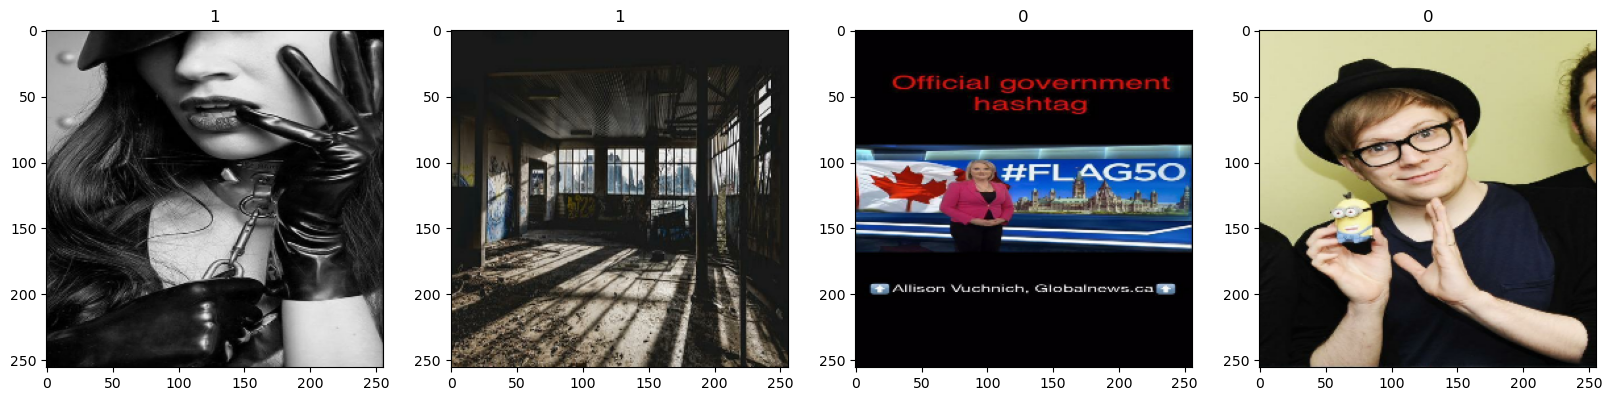

In [40]:
data_iterator = data.as_numpy_iterator()
batch = data_iterator.next()
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [41]:
data = data.map(lambda x,y: (x/255, y))
data.as_numpy_iterator().next()
total_size=len(data)
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = total_size - train_size - val_size


train_size

train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


In [42]:
model=Sequential()
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(3, activation='softmax'))
model.compile('adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

In [43]:
logdir='logs'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)
hist = model.fit(train, epochs=30, validation_data=val, callbacks=[tensorboard_callback])
#hist = model.fit(train, one_hot_labels[:train_size], epochs=20, validation_data=(val, one_hot_labels[train_size:]), callbacks=[tensorboard_callback])

Epoch 1/30
107/107 [==============================] - 210s 2s/step - loss: 1.1455 - accuracy: 0.3496 - val_loss: 1.0958 - val_accuracy: 0.3594
Epoch 2/30
107/107 [==============================] - 202s 2s/step - loss: 1.0932 - accuracy: 0.3727 - val_loss: 1.0936 - val_accuracy: 0.3719
Epoch 3/30
107/107 [==============================] - 201s 2s/step - loss: 1.0379 - accuracy: 0.4498 - val_loss: 1.1283 - val_accuracy: 0.3510
Epoch 4/30
107/107 [==============================] - 201s 2s/step - loss: 0.8941 - accuracy: 0.5599 - val_loss: 1.1606 - val_accuracy: 0.4062
Epoch 5/30
107/107 [==============================] - 201s 2s/step - loss: 0.7112 - accuracy: 0.6606 - val_loss: 1.1943 - val_accuracy: 0.4323
Epoch 6/30
107/107 [==============================] - 203s 2s/step - loss: 0.5366 - accuracy: 0.7848 - val_loss: 1.5823 - val_accuracy: 0.4510
Epoch 7/30
107/107 [==============================] - 206s 2s/step - loss: 0.3707 - accuracy: 0.8525 - val_loss: 1.7346 - val_accuracy: 0.4656

In [50]:
train_accuracy = hist.history['accuracy'][-1]  # Last epoch's training accuracy

print(f"Training Accuracy with CNN : {train_accuracy * 100:.2f}%")

Training Accuracy with CNN : 99.62%
